### В этом ноутбуке мы поговорим про метрики в Машинно Обучении

Когда мы обучаем модель машинного обучения, важно понять, насколько хорошо она работает. Для этого мы используем метрики, которые помогают количественно оценить производительность модели. Метрики дают нам возможность сравнивать разные модели и выбирать лучшую.

**Что такое метрики и зачем они нужны?**

Метрики - это числовые показатели, которые используются для оценки качества работы модели машинного обучения. Они помогают:

1. Определить, насколько точны предсказания модели.
2. Сравнить производительность разных моделей.
3. Понять, где модель ошибается и как её можно улучшить.

**Метрика Accuracy для классификации**

Accuracy (точность) - это одна из самых простых и популярных метрик для оценки моделей классификации. Она вычисляется как доля правильных предсказаний среди всех предсказаний:

$Accuracy=\frac{Количество.правильных.предсказаний}{Общее.количество.предсказаний}$

Интуиция:   Accuracy показывает, насколько часто модель делает правильные предсказания.

Возможные проблемы:   Accuracy может быть вводящей в заблуждение, если классы несбалансированы. Например, если 95% данных 
принадлежат к одному классу, то модель, которая всегда предсказывает этот класс, будет иметь высокую точность, но это не значит, что модель хорошая.

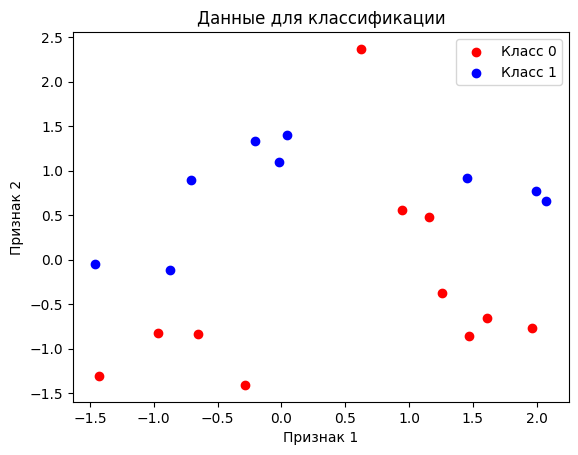

In [1]:
# Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Создаем данные для классификации
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Визуализируем данные
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс 1')


plt.title('Данные для классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Создаем и обучаем модель логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Предсказываем значения для тестовой выборки
y_pred = log_reg.predict(X)

# Вычисляем точность модели
accuracy = accuracy_score(y, y_pred)
print(f'Точность модели логистической регрессии: {accuracy:.2f}')


Точность модели логистической регрессии: 0.75


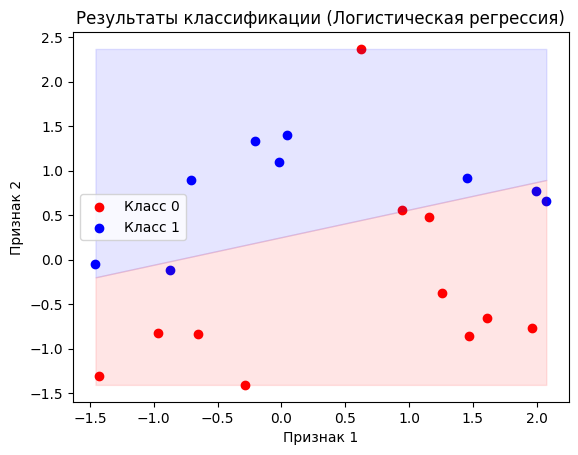

In [20]:
# Визуализируем результаты
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Класс 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Класс 1')


# Добавляем границу принятия решения
x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])
x1_1 = (-log_reg.intercept_[0] - log_reg.coef_[0][0] * x0_1) / log_reg.coef_[0][1]
x1_2 = (-log_reg.intercept_[0] - log_reg.coef_[0][0] * x0_2) / log_reg.coef_[0][1]
# Область выше границы принятия решения - синяя, ниже - красная
plt.fill_between([x0_1, x0_2], [x1_1, x1_2], y2=np.amax(X[:, 1]), color='blue', alpha=0.1)
plt.fill_between([x0_1, x0_2], [x1_1, x1_2], y2=np.amin(X[:, 1]), color='red', alpha=0.1)


plt.title('Результаты классификации (Логистическая регрессия)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

___

Мы получили оценку нашей модели, но кажется что то не так... Сейчас мы обучаем и тестируем модель на одних и тех же данных, как вы думаете в чем здесь проблема? 

По сути сейчас модель может просто запомнить все обучающие данные и на всех тестах выдавать идеальные результаты, но в реальном условия окажется что модель работает далеко не так хорошо. Такое поведение модели когда она слишком сильно "подстраивается" под обучающие данные и не выделяет реальные закономерности называется **переобучение**.

**Разбиение данных на тренировочные и тестовые**

Зачем это нужно?

* Чтобы оценить, насколько хорошо модель будет работать на новых, невиданных данных.
* Чтобы избежать переобучения (overfitting), когда модель хорошо работает на обучающих данных, но плохо на реальных

Интуиция:

* Если мы обучаем модель и тестируем её на одних и тех же данных, модель может просто запомнить эти данные и не научиться обобщать информацию для новых данных.
* Разделение данных на тренировочные (train) и тестовые (test) позволяет нам проверить, как хорошо модель обобщает информацию.

Процесс разбиения:

* Обычно данные делят на тренировочную и тестовую выборки в соотношении 70/30 или 80/20 и **перемешивают**.
* Тренировочные данные используются для обучения модели.
* Тестовые данные используются для проверки производительности модели.

In [24]:
# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split

# Создаем данные
X, y = np.arange(10).reshape((5, 2)), range(5)

print("Исходные данные:\n", X)

# Разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Тренировочные данные (X_train):\n", X_train)
print("Тестовые данные (X_test):\n", X_test)


Исходные данные:
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Тренировочные данные (X_train):
 [[8 9]
 [4 5]
 [0 1]
 [6 7]]
Тестовые данные (X_test):
 [[2 3]]


___


**Метрики для регрессии**

Для задач регрессии, где мы предсказываем непрерывные значения, также существует несколько метрик. Самая интуитивная - просто взять сумму всех модулей разности нашего предсказания и правильного ответа.

**Метрика MAE (Mean Absolute Error)**

MAE - это среднее абсолютное отклонение предсказанных значений от истинных:

MAE = $\frac{1}{n} * \sum_{i=1}^n |y_i - \^y_i|$ 

где:

$y_i$​ - истинное значение,

$\^y_i$​ - предсказанное значение,

n - количество предсказаний.

Интуиция:

* MAE показывает среднюю величину ошибки.
* Она проста в интерпретации и даёт представление о среднем отклонении предсказаний от реальных значений.

___
**Метрика MSE (Mean Squared Error)**

MSE - это среднее квадратическое отклонение предсказанных значений от истинных:

MSE = $\frac{1}{n} * \sum_{i=1}^n (y_i - \^y_i)^2$ 


Интуиция:

* MSE усиливает влияние больших ошибок, так как ошибки возводятся в квадрат.
* Это полезно, когда нам важно сильно штрафовать большие ошибки.

In [38]:
# Импортируем необходимые библиотеки
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создаем данные
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Рассчитываем метрики
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')



MAE: 0.50
MSE: 0.38
